# 🪟 Exploring windows

The goal is to select a window length that is adequate for ictal, preictal, interictal and postictal periods.

## 📶 The idea

### 1️⃣ Length of window

The idea is to take a window of length $L$.

$$
L = \frac{1}{N} \sum_{i=1}^{N} \text{w}_i
$$

Where $N$ is the number of ictal windows, and $\text{w}_i$ is the length of the $i$-th ictal window. It's basically the average length of the ictal windows.

Each $w_i$ is computed as the difference between the start and end of the $i$-th ictal period.

### 2️⃣ Take 5 minutes before each ictal period (this is the preictal period)

Notice that there will be $M$ windows before each ictal period.

$$
M = \frac{5*60*\text{freq}}{L}
$$

### 3️⃣ Take 5 minutes from a file without seizure (this is the interictal period)

We will have $M$ windows from a file without seizure.


---

## 1️⃣ \<Compute the length of the window>

In [1]:
import os
# move to ../src/data_handler.py
os.chdir("../src")
import data_handler
import pandas as pd
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt
from plots_config import plots_config

plots_config(plt)

print()

In [2]:
data_handler.get_seizure_times("chb01")

[[(2996, 3036)],
 [(1467, 1494)],
 [(1732, 1772)],
 [(1015, 1066)],
 [(1720, 1810)],
 [(327, 420)],
 [(1862, 1963)]]

In [3]:
patients = data_handler.get_patients()
W = [] # list of windows lengths

for patient in patients:
    W.extend([t[1] - t[0] for sublist in data_handler.get_seizure_times(patient) for t in sublist])

print(W)

[40, 27, 40, 51, 90, 93, 101, 82, 81, 9, 52, 65, 69, 52, 47, 64, 53, 49, 111, 102, 116, 115, 110, 96, 120, 117, 14, 15, 15, 20, 20, 16, 12, 13, 12, 16, 86, 96, 143, 171, 190, 134, 160, 264, 64, 79, 71, 62, 35, 70, 65, 58, 76, 89, 54, 22, 32, 752, 61, 32, 13, 23, 20, 26, 32, 32, 32, 45, 37, 80, 97, 40, 35, 27, 25, 42, 52, 48, 34, 39, 38, 36, 46, 37, 27, 21, 23, 27, 25, 23, 43, 55, 46, 51, 28, 29, 25, 23, 44, 70, 31, 64, 20, 18, 17, 62, 22, 65, 65, 57, 14, 20, 22, 14, 41, 20, 22, 16, 125, 31, 157, 35, 55, 205, 190, 120, 60, 119, 63, 107, 140, 71, 55, 177, 71, 71, 32, 108, 9, 9, 14, 6, 9, 6, 8, 8, 8, 7, 90, 115, 88, 50, 30, 68, 55, 68, 46, 78, 77, 81, 29, 30, 39, 38, 35, 49, 35, 39, 56, 50, 81, 12, 58, 74, 72, 113, 20, 47, 71, 62, 27, 84, 25, 25, 29, 25, 32, 27, 19, 24, 22, 19, 70, 16, 27, 17, 66, 68]


In [4]:
np.mean(W)

58.64141414141414

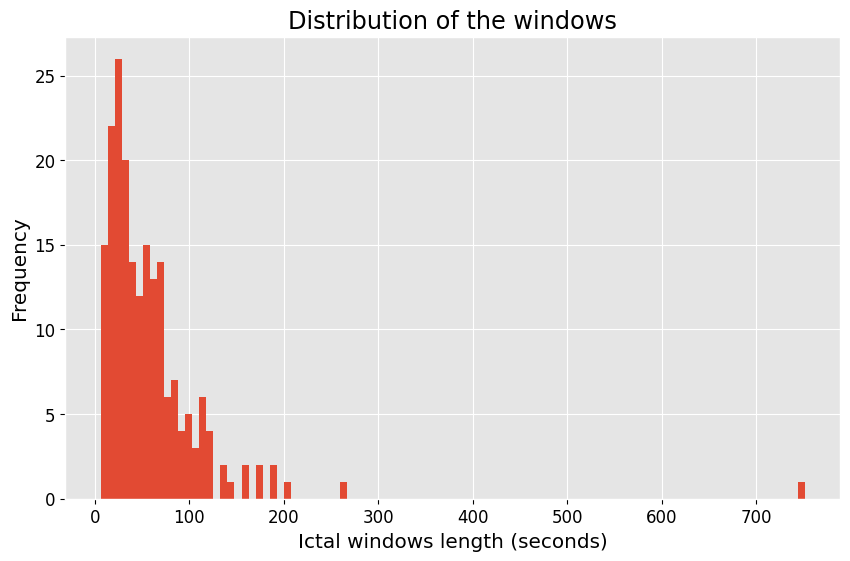

In [19]:
# plot the distribution of the windows

plt.hist(W, bins=100)
plt.title("Distribution of the windows")
plt.xlabel("Ictal windows length (seconds)")
plt.ylabel("Frequency")
plt.show()

In [25]:
W_without_outliers = [w for w in W if w < 300]
np.mean(W_without_outliers)

55.121827411167516

### 🌎 Plots in Spanish

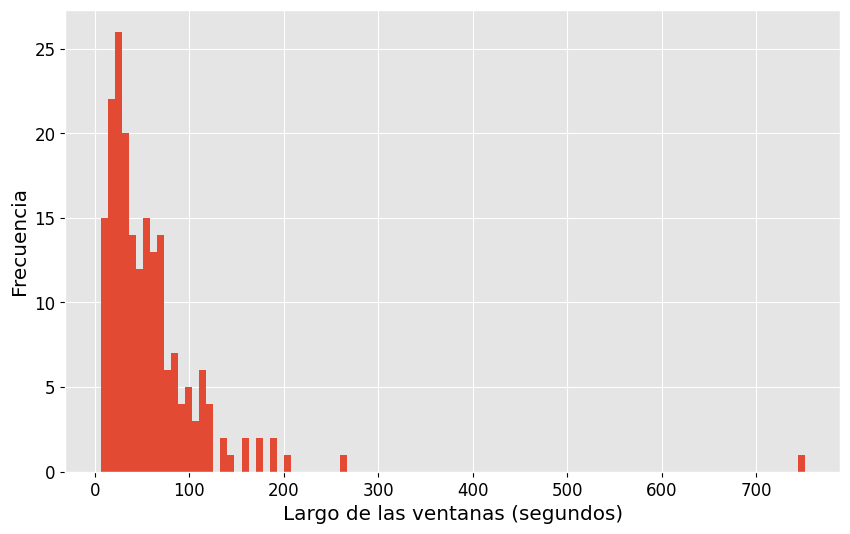

In [17]:
# plot the distribution of the windows (for the spanish paper)

plt.hist(W, bins=100)
plt.xlabel("Largo de las ventanas (segundos)")
plt.ylabel("Frecuencia")
plt.show()

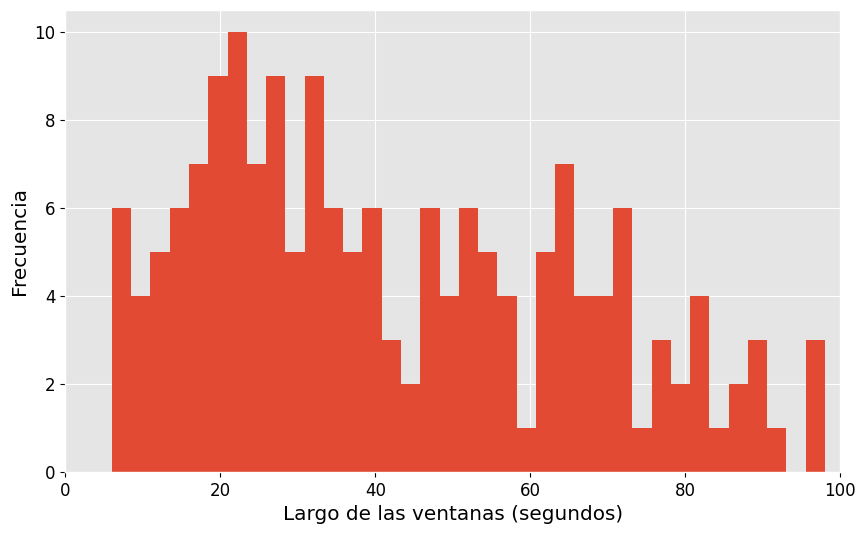

In [20]:
# just plotting from 0 to 100 seconds (in spanish)

plt.hist(W, bins=300)
plt.xlabel("Largo de las ventanas (segundos)")
plt.ylabel("Frecuencia")
plt.xlim(0, 100)
plt.show()

## 2️⃣ \<Take 5 minutes of preictal period>

M windows before each ictal period. This is 5 minutes before each ictal period.

Because of $L = 55 \text{sec}$ we can round it to $L = 60 \text{sec}$. So there will be 5 windows before each ictal period.